In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects as pe


def transform(y):
    # return x
    return [x[0]+x[1] - 1 for x in y]


def plot(datasets, labels=None):
    """
    Plots log10(value) vs log10(position) for one or more datasets.
    Fits and displays line of best fit (from point 30 onward) if len(data) > 50.
    Slopes are shown in the legend.
    """
    # Accept single dataset
    if not isinstance(datasets, (list, tuple)) or (
        len(datasets) > 0 and not isinstance(datasets[0], (list, np.ndarray, tuple))
    ):
        datasets = [datasets]

    if labels is None:
        labels = [f"data {i+1}" for i in range(len(datasets))]

    plt.figure(figsize=(8, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))

    for data, label, color in zip(datasets, labels, colors):
        vals = np.asarray(data, dtype=float)
        if np.any(vals <= 0):
            raise ValueError(f"All values in {label} must be > 0 to take log10.")

        y = np.log10(vals)
        x = np.log10(np.arange(1, len(y) + 1))

        slope_text = ""
        if len(y) > 50:
            x_fit = x[29:]
            y_fit = y[29:]
            slope, intercept = np.polyfit(x_fit, y_fit, 1)
            slope_text = f": slope={slope:.3f}"
            plt.plot(x_fit, slope * x_fit + intercept, linestyle='--', linewidth=2, color=color, alpha=0.9)

        plt.plot(x, y, marker='o', linestyle='-', alpha=0.8, color=color, label=f"{label}{slope_text}")

    plt.xlabel('log₁₀(Position)')
    plt.ylabel('log₁₀(Value)')
    plt.title('Log–Log Plot of Data')
    plt.grid(True, which='both', linestyle=':', linewidth=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [11]:
import ast

filenames = ["predicted_exploit_values_short.txt", "predicted_exploit_values_original_short.txt"]

def get_data(filenames):
    data = []
    for name in filenames:

        with open(name, "r") as f:
            lines = f.readlines()
            last_list = ast.literal_eval(lines[-1].strip()) if lines else []
        data.append(transform(last_list))
    return data


all_data = get_data(filenames)

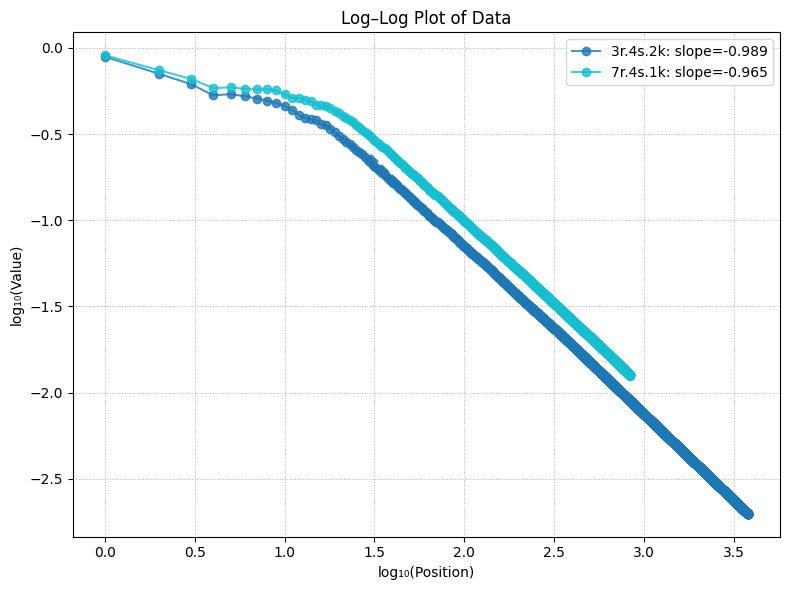

[3796, 843]
[0.5009905030006281, 0.5062820440485103]


In [12]:
plot(all_data, labels=['3r.4s.2k', '7r.4s.1k'])
print([len(x) for x in all_data])
print([(1+x[-1])/2 for x in all_data])